# Make some exercises after the paragraph

## 9.2

Scam transaction credit card decision tree 

In [18]:
import pandas as pd
import numpy as np

In [19]:
data = pd.DataFrame({"Сумма":[100, 100, 10000, 10000, 5000, 100],
                     "Получатель":[0, 1, 1, 0, 1, 1],
                     "Scam":[1, 0, 0, 1, 1, 0]}, index=np.arange(1, 7))
data.index.name = "Транзакция"
data


,Сумма,Получатель,Scam
Транзакция,,,
1,100,0,1
2,100,1,0
3,10000,1,0
4,10000,0,1
5,5000,1,1
6,100,1,0


In [20]:
def entropy(set: pd.Series) -> float:
    """
    Функция для вычисления энтропии series pandas
    """
    probs = set.value_counts(normalize=True)
    entropy = probs * np.log2(probs)
    entropy = -entropy.sum()
    return entropy

print("Энтропия изначального множества: ", entropy(data["Scam"]))

Энтропия изначального множества:  1.0


In [21]:
def gini(set:pd.Series) -> float:
    """
    Функция для вычисления джини из series pandas
    """
    probs = set.value_counts(normalize=True)
    return 1 - (probs ** 2).sum()

print("Индекс Джини изначального множества: ", gini(data["Scam"]))

Индекс Джини изначального множества:  0.5


## 9.2 using sklearn

In [22]:
import sklearn.tree as tree
import utils

In [23]:
decision_tree = tree.DecisionTreeClassifier(criterion="gini", max_depth=1, random_state=0)
decision_tree.fit(data[["Сумма", "Получатель"]], data["Scam"])


DecisionTreeClassifier(max_depth=1, random_state=0)

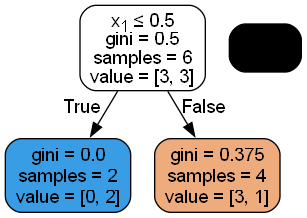

In [24]:
utils.display_tree(decision_tree)